In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff

# Метод на най-малките квадрати - част 1

### Задача 1
Да се намери линейна функция, която приближава по метода на най-малките квадрати данните от таблицата

|x| 0 | 1 | 2 | 3 | 4
|---|---|---|---|---|---|
|y|0|1|1|2|2|

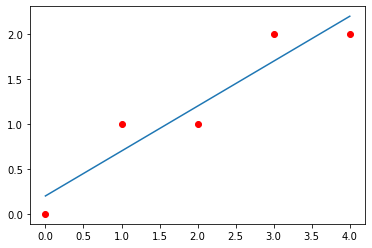

In [7]:
nodes = np.array([0.0, 1,2,3,4])
values = np.array([0.0,1,1,2,2])
a,b = symbols('a, b')

def f(x):
    return a*x + b

phi = 0
for i in range(nodes.size):
    phi += (f(nodes[i]) - values[i])**2

diffA = diff(phi, a)
diffB = diff(phi, b)
solution = solve([Eq(diffA,0), Eq(diffB,0)])

def f_solution(x, sol_dict):
    return sol_dict[a]*x + sol_dict[b]

x_axis = np.linspace(0,4,100);
plt.scatter(nodes,values,color='red')
plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

### Задача 2

Във файла *CO_2_data.csv* се съдръжат данни за нивата на въглеродния диоксид в атмосферата (в млрд. тонове) за периода 1940-2022г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи линейна функция, която приближава данните.

*Източник: https://www.statista.com/statistics/276629/global-co2-emissions/*

In [9]:
import pandas as pd

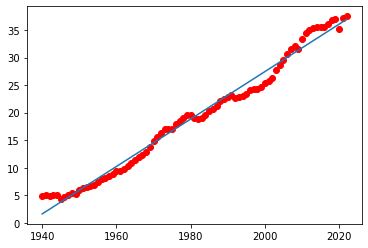

In [17]:
table = pd.read_csv('CO_2_data.csv')
nodes = table['year']
values = table['co2']

a,b = symbols('a, b')

def f(x):
    return a*x + b

phi = 0
for i in range(nodes.size):
    phi += (f(nodes[i]) - values[i])**2

diffA = diff(phi, a)
diffB = diff(phi, b)

solution = solve([Eq(diffA,0), Eq(diffB, 0)])

def f_solution(x, solution_dict):
    return solution_dict[a]*x + solution_dict[b]

x_axis = np.linspace(1940,2022, 200)
plt.scatter(nodes, values, color='red')
plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

### Задача 3

Известно е, че връзката между скоростта на вятъра и генерираното количество електроенергия от една вятърна турбина може да се опише чрез кубична функция.
Във файла *wind_turbine_data_sample.csv* се съдръжат измервания за количеството прозиведена електроенергия (kW) от конкретен вятърен генератор в зависимост от скоростта на вятъра (m/s).
Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати да се построи полином от трета степен, който приближава данните.

*Източник: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset/*

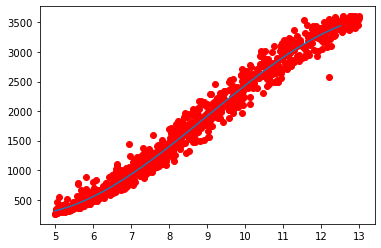

In [48]:
table = pd.read_csv('wind_turbine_data_sample.csv')
nodes = table['wind speed']
values = table['power output']
a,b,c,d = symbols('a, b, c, d')

def f(x):
    return a*(x**3) + b*(x**2) + c*x + d

phi = 0
for i in range(nodes.size):
    phi += (f(nodes[i]) - values[i])**2

diffA = diff(phi, a)
diffB = diff(phi, b)
diffC = diff(phi, c)
diffD = diff(phi, d)

solution = solve([Eq(diffA,0), Eq(diffB,0), Eq(diffC,0), Eq(diffD, 0)])
def f_solution(x, solution_dict):
    return solution_dict[a]*(x**3) + solution_dict[b]*(x**2) + solution_dict[c]*x + solution_dict[d]

x_axis = np.linspace(5, 12.5, 200)
plt.scatter(nodes,values,color='red')
plt.plot(x_axis, f_solution(x_axis, solution))
plt.show()

### Задача 4

Във файла *amazon_sales_net_revenue.csv* се съдръжат данни за годишния приход на Amazon в млрд. щатски долари за периода 2004 - 2021г. Да се зареди файла и да се визуализират данните. По метода на най-малките квадрати, да се построи функция от вида $ f(x) = a e^{bx}$, която моделира данните.


*Източник: https://www.statista.com/statistics/266282/annual-net-revenue-of-amazoncom/*